In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale=2)

steam
-> Game data from Steam. Each row has a unique AppID and is usually a separate release, excepting some re-releases and remasters.

steam_media_data
-> header_image, screenshots,background,movies

steam_requirements_data
-> system requirements



In [2]:
steam = pd.read_csv('steam.csv',engine='python', encoding='utf-8')
steam_media_data = pd.read_csv('steam_media_data.csv')
steam_requirements_data = pd.read_csv('steam_requirements_data.csv')
steam_top_100 = pd.read_csv('steam_top_100.csv')
steamspy_tag_data = pd.read_csv('steamspy_tag_data.csv')

In [3]:
# 원화 가격 컬럼 추가
steam['price_won'] = (steam['price'] * 1600).astype(int)

In [4]:
# 총 평점 (비율)
steam['total_rating'] = (steam['positive_ratings']*100 / (steam['positive_ratings'] + steam['negative_ratings'])).astype(int)

In [5]:
steam['release_date'] = steam['release_date'].apply(lambda x: x[:4])

In [6]:
steam.drop(['appid','publisher','median_playtime','price'], axis=1, inplace=True)

In [7]:
date = steam['release_date'].value_counts()
date = date.head(10).sort_values()

C:\Users\ksw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number Of Games Released')

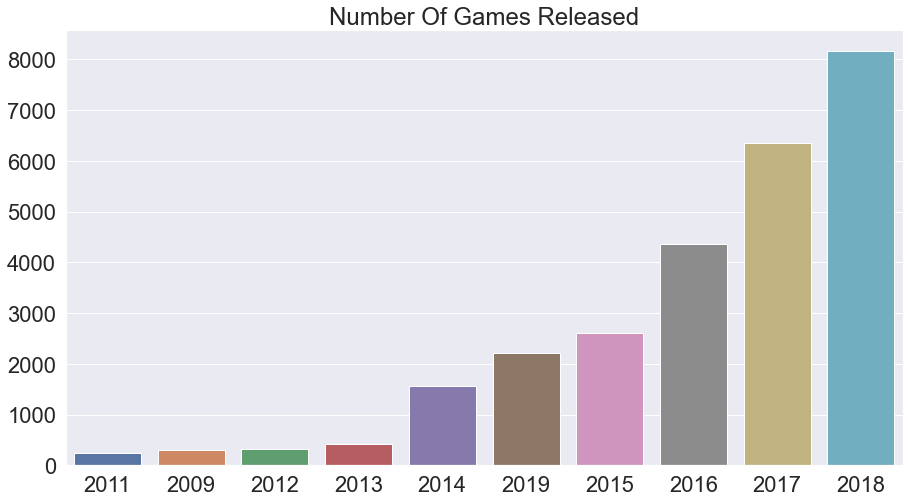

In [8]:
# 게임 출시 수 가장 많은 년도 top 10
p = sns.barplot(date.index,date.values)
p.set_title('Number Of Games Released')

In [9]:
steam['genres'].value_counts()

Action;Indie                                                             1852
Casual;Indie                                                             1482
Action;Adventure;Indie                                                   1229
Adventure;Indie                                                          1170
Action;Casual;Indie                                                      1004
                                                                         ... 
Sexual Content;Violent;Gore;Action;Casual;Free to Play;Indie;Strategy       1
Nudity;Violent;Gore;Adventure;Indie;RPG;Early Access                        1
Violent;Action;Adventure;Casual;Indie;RPG;Early Access                      1
Indie;Simulation;Web Publishing                                             1
Casual;Free to Play;Massively Multiplayer;RPG;Early Access                  1
Name: genres, Length: 1552, dtype: int64

In [10]:
genres = set()
for genre in steam['genres']:
    words = genre.split(';')
    for word in words:
        genres.add(word)
print(len(genres))
print(genres)

29
{'RPG', 'Violent', 'Software Training', 'Early Access', 'Design & Illustration', 'Web Publishing', 'Free to Play', 'Simulation', 'Casual', 'Massively Multiplayer', 'Utilities', 'Documentary', 'Sexual Content', 'Animation & Modeling', 'Nudity', 'Game Development', 'Audio Production', 'Adventure', 'Accounting', 'Action', 'Video Production', 'Racing', 'Sports', 'Tutorial', 'Indie', 'Photo Editing', 'Education', 'Strategy', 'Gore'}


In [11]:
# TOP 5 RPG
steam[steam['genres'].str.contains('RPG')].sort_values('positive_ratings', ascending=False).head()

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
1467,PAYDAY 2,2013,1,OVERKILL - a Starbreeze Studio.,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,10000000-20000000,11984,84
1120,Terraria,2011,1,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,5000000-10000000,11184,97
1025,The Elder Scrolls V: Skyrim,2011,1,Bethesda Game Studios,windows,16,Single-player;Steam Achievements;Steam Trading...,RPG,Open World;RPG;Fantasy,75,237303,14951,7089,10000000-20000000,15984,94
2016,Rust,2018,1,Facepunch Studios,windows;mac,18,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Crafting;Multiplayer,48,220370,53709,9352,5000000-10000000,44464,80
2964,The Witcher® 3: Wild Hunt,2015,1,CD PROJEKT RED,windows,0,Single-player;Steam Achievements;Full controll...,RPG,Open World;RPG;Story Rich,78,202930,4798,3068,5000000-10000000,39984,97


In [12]:
# TOP 5 스포츠
steam[steam['genres'].str.contains('Sports')].sort_values('positive_ratings', ascending=False).head()

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
2031,Rocket League®,2015,1,"Psyonix, Inc.",windows;mac;linux,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Indie;Racing;Sports,Multiplayer;Racing;Soccer,88,242561,21816,5825,5000000-10000000,23984,91
7975,VRChat,2017,1,VRChat Inc.,windows,0,Single-player;Multi-player;Online Multi-Player...,Adventure;Casual;Free to Play;Massively Multip...,Early Access;Free to Play;Memes,0,25818,3323,1351,2000000-5000000,0,88
1290,SpeedRunners,2016,1,DoubleDutch Games,windows;mac;linux,0,Single-player;Online Multi-Player;Local Multi-...,Action;Casual;Indie;Racing;Sports,Multiplayer;Racing;Local Multiplayer,29,20854,1455,421,1000000-2000000,17584,93
3481,DiRT Rally,2015,1,Codemasters Racing Studio;Feral Interactive (L...,windows;mac;linux,0,Single-player;Multi-player;Steam Achievements;...,Racing;Simulation;Sports,Racing;Simulation;Driving,170,17632,2496,488,1000000-2000000,39984,87
7702,Golf With Your Friends,2016,1,Blacklight Interactive,windows;mac;linux,0,Single-player;Online Multi-Player;Cross-Platfo...,Casual;Indie;Sports;Early Access,Early Access;Mini Golf;Multiplayer,39,15946,1723,323,1000000-2000000,7664,90


In [13]:
# TOP 5 시뮬레이션 분야
steam[steam['genres'].str.contains('Simulation')].sort_values('positive_ratings', ascending=False).head()

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
121,Garry's Mod,2006,1,Facepunch Studios,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,10000000-20000000,11184,95
1596,Euro Truck Simulator 2,2012,1,SCS Software,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Indie;Simulation,Simulation;Driving;Open World,67,176769,5825,4942,5000000-10000000,23984,96
7175,Stardew Valley,2016,1,ConcernedApe,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Indie;RPG;Simulation,RPG;Simulation;Pixel Graphics,40,118217,3761,2868,2000000-5000000,17584,96
1817,The Forest,2018,1,Endnight Games Ltd,windows,18,Single-player;Multi-player;Co-op;Partial Contr...,Action;Adventure;Indie;Simulation,Survival;Open World;Horror,45,110460,8881,2417,2000000-5000000,24784,92
3864,Don't Starve Together,2016,1,Klei Entertainment,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Adventure;Indie;Simulation,Survival;Multiplayer;Co-op,0,108601,4206,1070,5000000-10000000,17584,96


In [14]:
# TOP 5 전체
steam.sort_values('positive_ratings', ascending=False).head()

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
25,Counter-Strike: Global Offensive,2012,1,Valve;Hidden Path Entertainment,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,50000000-100000000,0,86
22,Dota 2,2013,1,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,100000000-200000000,0,85
19,Team Fortress 2,2007,1,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,20000000-50000000,0,93
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,1,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,50000000-100000000,43184,50
121,Garry's Mod,2006,1,Facepunch Studios,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,10000000-20000000,11184,95


In [15]:
# TOP 5 호불호가 가장 심한 게임
steam[steam['total_rating']==50].sort_values('positive_ratings',ascending=False).head()

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,1,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,50000000-100000000,43184,50
14890,The Crew™ 2,2018,1,Ivory Tower,windows,0,Single-player;Online Multi-Player;MMO;Online C...,Action;Massively Multiplayer;Racing,Racing;Open World;Driving,34,4030,3916,2029,200000-500000,79984,50
3212,Total War Battles: KINGDOM,2015,1,CREATIVE ASSEMBLY,windows;mac,0,Single-player;Multi-player,Free to Play;Strategy,Strategy;Free to Play;Medieval,0,1692,1646,177,500000-1000000,0,50
2846,Mortal Online,2015,1,Star Vault AB,windows,0,MMO;Steam Achievements;Steam Trading Cards;Ste...,Action;Free to Play;Indie;Massively Multiplaye...,Free to Play;Open World;Massively Multiplayer,49,1362,1326,106,500000-1000000,0,50
6485,Call of Duty®: Modern Warfare® Remastered,2017,1,Raven Software;Beenox,windows,0,Single-player;Online Multi-Player;Online Co-op...,Violent;Action,FPS;Action;Multiplayer,50,1148,1112,302,20000-50000,55984,50


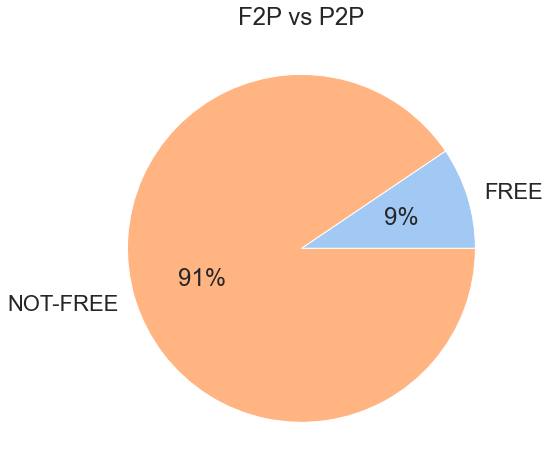

In [16]:
# 무료 게임 vs 유료 게임

f2p = steam[steam['price_won']==0]
p2p = steam[steam['price_won']!=0]
colors = sns.color_palette('pastel')[0:5]
plt.pie([len(f2p),len(p2p)], labels = ['FREE','NOT-FREE'], colors = colors, autopct='%.0f%%')
plt.title('F2P vs P2P')
plt.show()

In [17]:
# 유저수가 가장 많은 게임
users = steam[['owners']] 
most_user = steam[steam['owners']=='100000000-200000000']
most_user

,name,release_date,english,developer,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price_won,total_rating
22,Dota 2,2013,1,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,100000000-200000000,0,85


C:\Users\ksw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksw\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


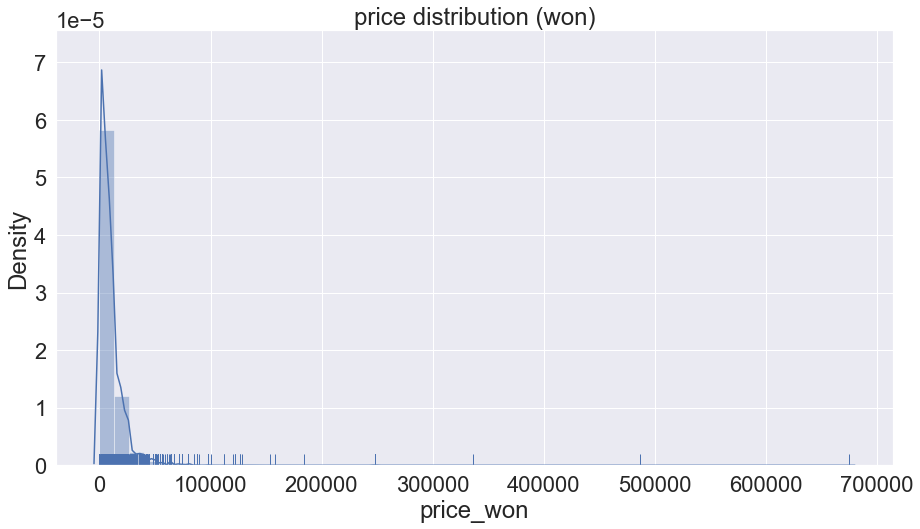

In [18]:
# 게임 가격 분포도
sns.distplot(steam['price_won'], kde=True, rug=True)
plt.title('price distribution (won)')
plt.show()

C:\Users\ksw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Genre of TOP 50 Games with Most Positive Ratings')

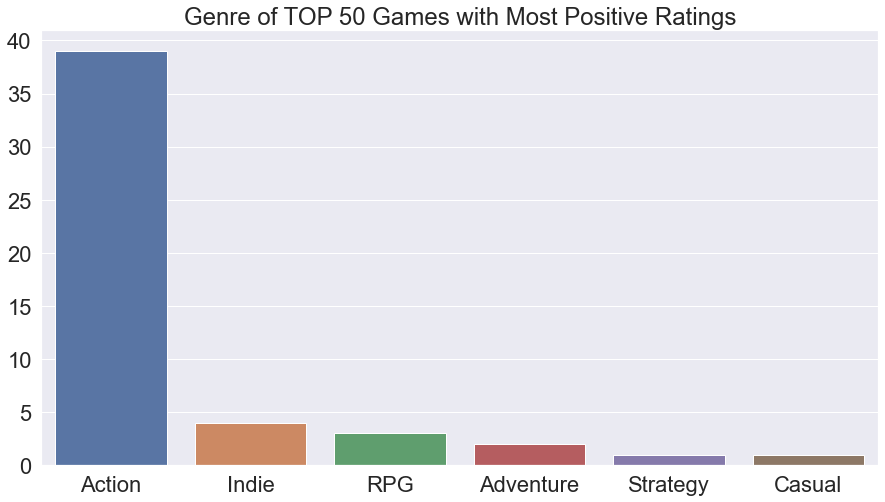

In [19]:
# 가장 좋은 평가를 많이 받은 게임 50개의 장르 분포 
game_dist = steam.sort_values('positive_ratings', ascending=False).head(50)
game_genre = dict()
for genre in game_dist['genres'].values:
    if genre.split(';')[0] in game_genre.keys():
        game_genre[genre.split(';')[0]] += 1
    else:
        game_genre[genre.split(';')[0]] = 1
game_genre = {k: v for k, v in sorted(game_genre.items(), key=lambda item: item[1], reverse=True)}
x = list(game_genre.keys())
y = list(game_genre.values())
genre = sns.barplot(x,y)
genre.set_title('Genre of TOP 50 Games with Most Positive Ratings')

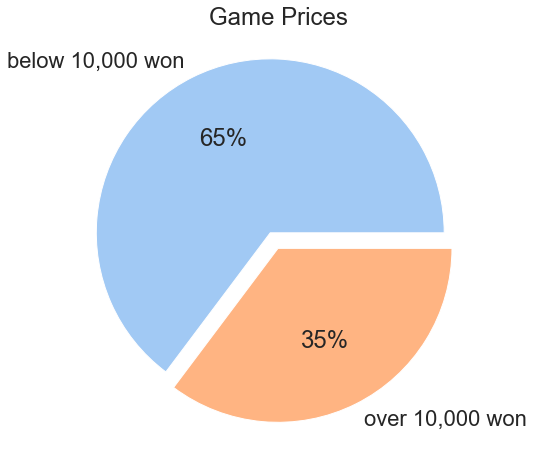

In [34]:
# game price ratio
price_low = steam[steam['price_won']<= 10000].size
price_high = steam[steam['price_won'] > 10000].size
price_count = [price_low,price_high]
explode = [0.1, 0]
palette_color = sns.color_palette('pastel') 
plt.pie(price_count, labels=['below 10,000 won', 'over 10,000 won'],colors=palette_color, explode=explode, autopct='%.0f%%')
plt.title('Game Prices')
plt.show()